Enter the matrix rows:

Interpolation complete. The full interpolated mesh is ready for plotting or further analysis.


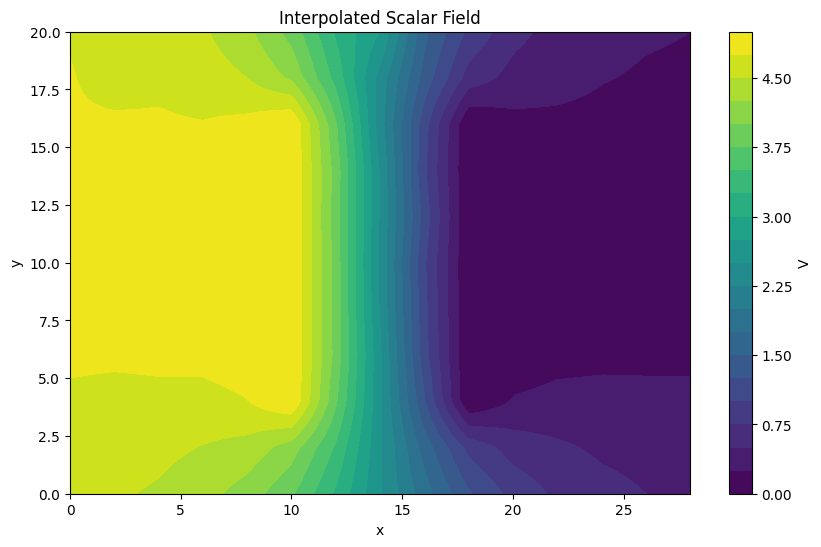

In [27]:
def bilinear_interpolation(x, y, x_coords, y_coords, V):
    """
    Computes bilinear interpolation using the formula:

    V = [ (x_i − x)(y_i − y)V(i-1,j-1) + (x_i − x)(y − y_(j-1))V(i-1,j) +
          (x − x_(i-1))(y_j − y)V(i,j-1) + (x − x_(i-1))(y − y_(j-1))V(i,j) ]
         -----------------------------------------------------------------------
         [(x_i − x_(i-1))(y_j − y_(j-1))]

    Parameters:
      - x, y: Query point coordinates.
      - x_coords: List of x coordinates for columns (length m).
      - y_coords: List of y coordinates for rows (length n).
      - V: n x m matrix with V[j][i] corresponding to the value at (x_coords[i], y_coords[j]).

    Returns:
      - Interpolated scalar value at (x, y).

    Raises:
      - ValueError: If (x, y) is outside the provided coordinate bounds.
    """
    # Locate the interval in x
    i0 = None
    for i in range(1, len(x_coords)):
        if x_coords[i - 1] <= x <= x_coords[i]:
            i0 = i - 1
            break
    if i0 is None:
        raise ValueError("x value is out of bounds of the provided x coordinates.")

    # Locate the interval in y
    j0 = None
    for j in range(1, len(y_coords)):
        if y_coords[j - 1] <= y <= y_coords[j]:
            j0 = j - 1
            break
    if j0 is None:
        raise ValueError("y value is out of bounds of the provided y coordinates.")

    i1 = i0 + 1
    j1 = j0 + 1

    x0, x1 = x_coords[i0], x_coords[i1]
    y0, y1 = y_coords[j0], y_coords[j1]

    # Compute the bilinear interpolation
    V_interp = (
        (x1 - x) * (y1 - y) * V[j0][i0] +
        (x1 - x) * (y - y0) * V[j1][i0] +
        (x - x0) * (y1 - y) * V[j0][i1] +
        (x - x0) * (y - y0) * V[j1][i1]
    ) / ((x1 - x0) * (y1 - y0))

    return V_interp

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt

    # Input the dimensions of the original grid
    n = int(input("Enter the number of rows (n) for the original grid: "))
    m = int(input("Enter the number of columns (m) for the original grid: "))

    # Input the matrix values for the scalar field
    print("Enter the matrix rows:")
    matrix = []
    for i in range(n):
        row_input = input(f"Row {i+1} (enter {m} space-separated numbers): ")
        row = list(map(float, row_input.split()))
        if len(row) != m:
            print("Error: The number of elements does not match the number of columns.")
            exit(1)
        matrix.append(row)

    # Input grid x coordinates (for columns)
    x_coords = list(map(float, input(f"Enter {m} x coordinates (space-separated) for the columns: ").split()))
    if len(x_coords) != m:
        print("Error: Number of x coordinates must equal the number of columns.")
        exit(1)

    # Input grid y coordinates (for rows)
    y_coords = list(map(float, input(f"Enter {n} y coordinates (space-separated) for the rows: ").split()))
    if len(y_coords) != n:
        print("Error: Number of y coordinates must equal the number of rows.")
        exit(1)

    # Determine the interpolation mesh resolution
    mesh_rows = int(input("Enter the number of interpolation rows (e.g., 100): "))
    mesh_cols = int(input("Enter the number of interpolation columns (e.g., 100): "))

    # Generate the query mesh points uniformly over the domain
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    x_query = np.linspace(x_min, x_max, mesh_cols)
    y_query = np.linspace(y_min, y_max, mesh_rows)
    X, Y = np.meshgrid(x_query, y_query)

    # Create an array to hold the interpolated scalar field values
    V_interp_mesh = np.zeros_like(X)

    # Loop over the mesh and compute the interpolated value at each point
    for i in range(mesh_rows):
        for j in range(mesh_cols):
            try:
                V_interp_mesh[i, j] = bilinear_interpolation(X[i, j], Y[i, j], x_coords, y_coords, matrix)
            except ValueError as e:
                # In case a query point falls outside the bounds (shouldn't happen with linspace)
                V_interp_mesh[i, j] = np.nan
                print(f"Warning: {e} at point ({X[i, j]}, {Y[i, j]})")

    # Output the results
    print("\nInterpolation complete. The full interpolated mesh is ready for plotting or further analysis.")

    # Example: Plot the interpolated scalar field
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(X, Y, V_interp_mesh, 20, cmap='viridis')
    colorbar = plt.colorbar(cp)
    colorbar.set_label("V")
    plt.title("Interpolated Scalar Field")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


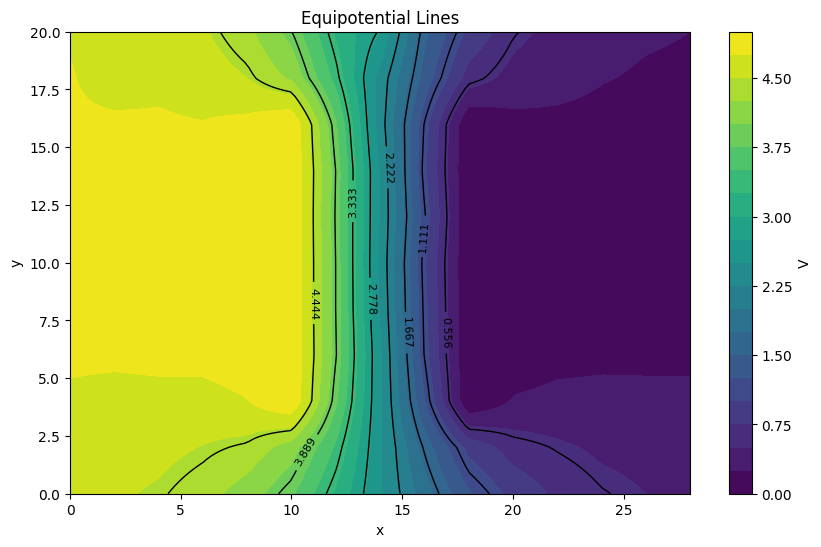

In [28]:
# Plot the interpolated scalar field as filled contours
plt.figure(figsize=(10, 6))
cp = plt.contourf(X, Y, V_interp_mesh, 20, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label("V")

# Define the levels for the equipotential lines
# You can either let Matplotlib choose them or specify your own levels
levels = np.linspace(np.nanmin(V_interp_mesh), np.nanmax(V_interp_mesh), 10)

# Plot equipotential lines on top of the filled contour plot
contours = plt.contour(X, Y, V_interp_mesh, levels=levels, colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=8)  # Label the lines

plt.title("Equipotential Lines")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


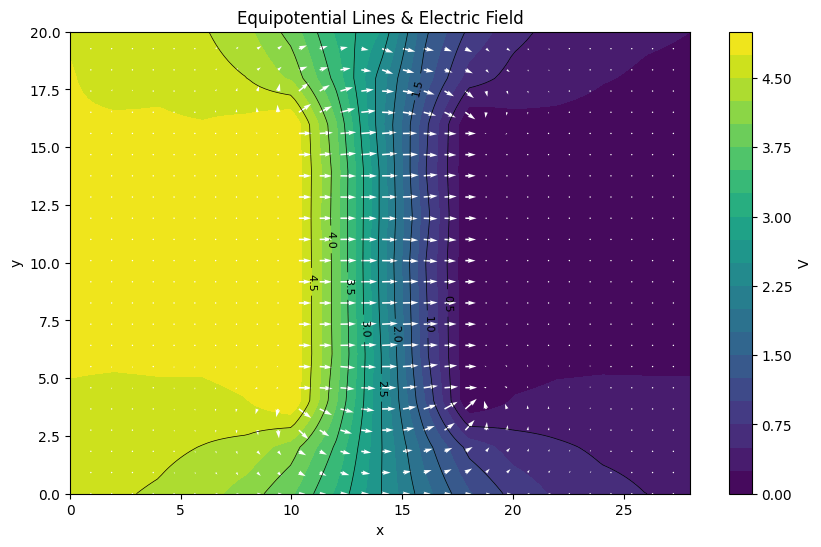

In [29]:
# --- Assume these are already defined from your interpolation step ---
# x_query: 1D array of x coordinates (length Nx)
# y_query: 1D array of y coordinates (length Ny)
# X, Y    : 2D arrays from np.meshgrid(...) -> shape (Ny, Nx)
# V_interp_mesh: 2D array of potential values, shape (Ny, Nx)

# 1) Compute uniform grid spacing (assuming x_query and y_query are equally spaced)
dx = x_query[1] - x_query[0]
dy = y_query[1] - y_query[0]

# 2) Initialize arrays for E_x and E_y (same shape as V_interp_mesh)
E_x = np.zeros_like(V_interp_mesh)
E_y = np.zeros_like(V_interp_mesh)

# 3) Compute the electric field via central differences
#    E_x = - (V[i, j+1] - V[i, j-1]) / (2 * dx)
#    E_y = - (V[i+1, j] - V[i-1, j]) / (2 * dy)
# Here, i ~ row ~ y direction; j ~ column ~ x direction.

# For the interior points:
E_x[:, 1:-1] = - (V_interp_mesh[:, 2:] - V_interp_mesh[:, :-2]) / (2 * dx)
E_y[1:-1, :] = - (V_interp_mesh[2:, :] - V_interp_mesh[:-2, :]) / (2 * dy)

# 4) Plot the potential as filled contours
plt.figure(figsize=(10, 6))
cp = plt.contourf(X, Y, V_interp_mesh, 20, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label("V")

# 5) Optionally plot equipotential lines
contours = plt.contour(X, Y, V_interp_mesh, levels=10, colors='black', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8)

# 6) Decimate the vector field if you want fewer arrows (optional)
decimation_factor = 5
Xq = X[::decimation_factor, ::decimation_factor]
Yq = Y[::decimation_factor, ::decimation_factor]
E_xq = E_x[::decimation_factor, ::decimation_factor]
E_yq = E_y[::decimation_factor, ::decimation_factor]

# 7) Plot the electric field vectors using quiver
#    Adjust 'scale' and 'width' to see arrows clearly
plt.quiver(Xq, Yq, E_xq, E_yq, color='white',
           scale=1, scale_units='xy', angles='xy', width=0.0025)

plt.title("Equipotential Lines & Electric Field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
